In [14]:
# Dependencies and libraries
import numpy as np
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import os
import datetime
import time

from config import api_key
from tickers import sector_symbol

In [15]:
# Looking at stock performance by industry relevant indexes

# Variable initialization
close_daily_price =[]
ticker_date = []
delta = datetime.timedelta(days=1)

# Search parameters
industry_index = sector_symbol
start_date = datetime.datetime(2020,1,1)
end_date = datetime.datetime(2021,1,1)
base_url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY'

# For loop to create the date column and create the results dataframe
while start_date <= end_date:
    
    ticker_date.append(start_date)
    
    # Building the results dataframe
    ticker_value_df = pd.DataFrame({'Date': ticker_date})
    
    start_date += delta
                                    
# Resetting start date
start_date = datetime.datetime(2019,8,1)
                                    
# For loop to make the call for every industry index and retrieving the data
for ticker in industry_index:
    
    # Building the search url
    url = f'{base_url}&symbol={ticker}&outputsize=full&apikey={api_key}'
    
    # Making the API call
    response = requests.get(url)
    response_json = response.json()
    
    #Progress tracker
    print (f'Processing {ticker} with code {response.status_code}')
    
    # Retrieving daily closing prices
    while start_date <= end_date:
    
        # Obtaining date as string
        string_date = start_date.strftime("%Y-%m-%d")

        # Exception for dates with no operation
        try:
            close_daily_price.append(float(response_json['Time Series (Daily)'][string_date]["4. close"]))
        except (KeyError):
            close_daily_price.append(0)  
        
        start_date += delta
                                    
    # Adding the current ticker to the dataframe
    ticker_value_df[ticker] = pd.Series(close_daily_price)
    close_daily_price.clear()
    start_date = datetime.datetime(2019,8,1)
    time.sleep(12)
    
print("API calls done")

Processing XLC with code 200
Processing XLP with code 200
Processing XLY with code 200
Processing XLE with code 200
Processing XLF with code 200
Processing XLV with code 200
Processing XLI with code 200
Processing XLB with code 200
Processing XLRE with code 200
Processing XLK with code 200
Processing XLU with code 200
API calls done


In [16]:
ticker_value_df

,Date,XLC,XLP,XLY,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU
0,2020-01-01,50.54,59.22,119.08,61.28,27.61,91.26,76.31,58.01,37.50,80.36,60.16
1,2020-01-02,50.05,59.23,118.10,60.40,27.60,91.05,75.82,57.33,37.79,79.05,60.15
2,2020-01-03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-01-04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-01-05,48.43,57.69,114.93,58.60,26.68,88.91,73.72,56.25,37.07,75.75,59.29
...,...,...,...,...,...,...,...,...,...,...,...,...
362,2020-12-28,56.65,62.67,135.03,36.91,24.01,105.77,71.64,60.99,35.92,105.61,60.45
363,2020-12-29,57.17,62.76,136.40,37.68,24.46,106.88,72.73,61.49,36.60,107.14,60.73
364,2020-12-30,57.33,62.76,136.29,36.20,24.02,106.14,72.00,60.30,36.30,107.74,60.73
365,2020-12-31,58.13,62.70,137.00,36.03,24.03,105.53,71.73,60.36,36.26,110.43,60.83


In [18]:
# Cleaning the results dataframe

# Dropping rows with no values (no stocks operations)
clean_df = ticker_value_df.loc[ticker_value_df["XLC"]!=0].reset_index(drop=True)
clean_df

# Dropping columns with no data (Indexes not found in the API)

# Creating the list with tickers to keep
keep_columns = []

for column in clean_df:
    column_index = clean_df.columns.get_loc(column)   
    if clean_df.iloc[0, column_index] != 0:
        keep_columns.append(column)
        
clean_df = clean_df[keep_columns]

clean_df

,Date,XLC,XLP,XLY,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU
0,2020-01-01,50.54,59.22,119.08,61.28,27.61,91.26,76.31,58.01,37.50,80.36,60.16
1,2020-01-02,50.05,59.23,118.10,60.40,27.60,91.05,75.82,57.33,37.79,79.05,60.15
2,2020-01-05,48.43,57.69,114.93,58.60,26.68,88.91,73.72,56.25,37.07,75.75,59.29
3,2020-01-06,49.13,58.21,116.68,58.53,27.11,90.06,74.83,56.32,37.53,77.01,60.03
4,2020-01-07,49.19,58.89,117.15,58.09,26.75,90.09,74.79,57.10,37.88,77.49,60.18
...,...,...,...,...,...,...,...,...,...,...,...,...
248,2020-12-27,57.24,62.44,136.38,37.55,24.07,105.89,72.14,62.36,35.21,106.86,59.55
249,2020-12-28,56.65,62.67,135.03,36.91,24.01,105.77,71.64,60.99,35.92,105.61,60.45
250,2020-12-29,57.17,62.76,136.40,37.68,24.46,106.88,72.73,61.49,36.60,107.14,60.73
251,2020-12-30,57.33,62.76,136.29,36.20,24.02,106.14,72.00,60.30,36.30,107.74,60.73


In [19]:
clean_df.describe()

,XLC,XLP,XLY,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU
count,253.000000,253.00000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,51.715534,60.31585,120.570040,48.896601,26.425296,96.800632,73.589802,56.194387,36.872846,89.967628,61.587628
std,3.842267,2.68048,9.686427,11.575149,3.526155,6.105762,8.339901,4.898897,3.121156,9.495023,4.363855
min,40.220000,48.63000,87.450000,23.570000,17.660000,74.620000,48.770000,38.350000,25.460000,70.400000,44.930000
25%,49.580000,58.92000,117.350000,37.450000,23.380000,91.440000,68.290000,54.950000,34.850000,81.460000,58.640000
50%,51.560000,60.78000,121.590000,54.920000,26.960000,98.500000,75.230000,57.530000,38.120000,88.420000,62.560000
75%,54.820000,62.04000,126.340000,59.340000,29.810000,101.750000,81.250000,59.880000,39.190000,97.180000,64.110000
max,58.130000,64.79000,137.360000,63.130000,31.170000,106.880000,85.230000,62.360000,41.930000,110.430000,70.980000


In [41]:
clean_df.dtypes

Date    datetime64[ns]
XLC            float64
XLP            float64
XLY            float64
XLE            float64
XLF            float64
XLV            float64
XLI            float64
XLB            float64
XLRE           float64
XLK            float64
XLU            float64
dtype: object

In [21]:
ticker_list=[]
inititial_price=[]
final_price=[]
#For loop to retrive data
for column in clean_df:
    if column !="Date":
        ticker_list.append(column)
        
        ticker_initial=clean_df.loc[clean_df["Date"]=='2020-01-01',column].tolist()
        inititial_price.append(ticker_initial[0])
        
        ticker_final=clean_df.loc[clean_df["Date"]=='2020-12-31',column].tolist()
        final_price.append(ticker_final[0])
        
                       
#Builiding the price change % dataframe
ava_df=pd.DataFrame({"Ticker":ticker_list,
                    "Initial":inititial_price,
                    "Final":final_price,})

#Comput price change%
ava_df['Percentage Price Change']= (ava_df['Final']-ava_df['Initial'])/(ava_df['Initial'])
ava_df['Percentage Price Change']=(ava_df['Percentage Price Change']*100).map("{:.2f}%".format)
ava_df

,Ticker,Initial,Final,Percentage Price Change
0,XLC,50.54,58.13,15.02%
1,XLP,59.22,62.70,5.88%
2,XLY,119.08,137.00,15.05%
3,XLE,61.28,36.03,-41.20%
4,XLF,27.61,24.03,-12.97%
5,XLV,91.26,105.53,15.64%
6,XLI,76.31,71.73,-6.00%
7,XLB,58.01,60.36,4.05%
8,XLRE,37.50,36.26,-3.31%
9,XLK,80.36,110.43,37.42%


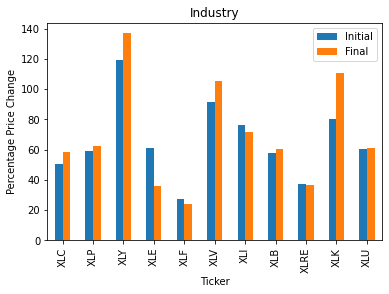

In [22]:
ava_df.plot(kind="bar")
plt.xticks(ava_df.index.tolist(),ava_df["Ticker"].tolist())
plt.title("Industry")
plt.xlabel("Ticker")
plt.ylabel("Percentage Price Change")
plt.show()

Text(0, 0.5, 'Price')

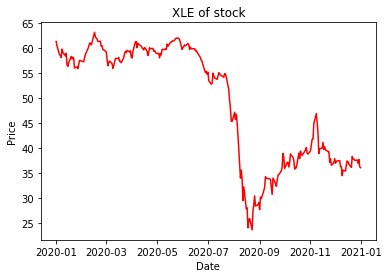

In [42]:
# Generate a scatter plot XPH 
x_axis = clean_df["Date"]
tumsiz = clean_df["XLE"]

fig1, ax1 = plt.subplots()
plt.title('XLE of stock')
#plt.axvline(x=44197)
plt.plot(x_axis, tumsiz,linewidth=1.5, markersize=0,marker="o",color="red", label="Fahreneit")
plt.xlabel('Date')
plt.ylabel('Price')

Text(0.5, 0, 'Date')

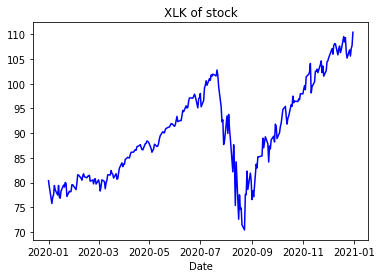

In [28]:
x_axis = clean_df["Date"]
tumsiz = clean_df["XLK"]

fig1, ax1 = plt.subplots()
plt.title('XLK of stock')
plt.plot(x_axis, tumsiz,linewidth=1.5, markersize=0,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Date')